In [ ]:
####Mohsin Essani

In [20]:

# importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# loading data
data = pd.read_excel("airlines.xlsx")




In [21]:
data.shape

(96, 2)

In [22]:
data.head(5)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [23]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [25]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [2]:
# converting 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# setting 'Month' column as index
data.set_index('Month', inplace=True)

Converting the Month column to a datetime format allows us to work with the dates as dates, rather than as strings or numeric values. This makes it easier to perform time series analysis and forecasting, as we can use built-in functions and methods to manipulate and analyze the dates.

Setting the Month column as the index of the DataFrame allows us to use the time series data in a more efficient way, as we can easily slice and access specific time periods using the index. This also allows us to take advantage of the built-in time series functionality in pandas, such as resampling and shifting, which can be used to prepare the data for forecasting.

In [3]:
# creating train and test sets
train_data = data[:'2001']
test_data = data['2002':]




Above code is used to split the original time series data into two sets: a training set and a test set. The training set is used to fit the forecasting model, while the test set is used to evaluate the performance of the model.

In this particular example, the code splits the data such that the training set includes all data up to the end of 2001, and the test set includes all data from 2002 onwards.

By splitting the data into training and test sets, we can evaluate the performance of the forecasting model on data that it has not seen during the training phase. This is important to ensure that the model is able to generalize well to new, unseen data.

# 1. Naive Method
The naive method assumes that the next value in the time series will be the same as the last observed value.

In [4]:
# creating naive forecast
y_hat_naive = test_data.copy()
y_hat_naive['naive_forecast'] = train_data['Passengers'][len(train_data)-1]



In [5]:
# calculating RMSE value
rmse_naive = sqrt(mean_squared_error(test_data['Passengers'], y_hat_naive['naive_forecast']))
print("RMSE value for Naive Method:", round(rmse_naive, 2))

RMSE value for Naive Method: 68.01


# 2. Simple Average Method
The simple average method assumes that the next value in the time series will be the average of all past observations.

In [6]:
# creating simple average forecast
y_hat_avg = test_data.copy()
y_hat_avg['avg_forecast'] = train_data['Passengers'].mean()




In [7]:
# calculating RMSE value
rmse_avg = sqrt(mean_squared_error(test_data['Passengers'], y_hat_avg['avg_forecast']))
print("RMSE value for Simple Average Method:", round(rmse_avg, 2))

RMSE value for Simple Average Method: 138.69


# 3. Moving Average Method
The moving average method assumes that the next value in the time series will be the average of a sliding window of past observations.

In [26]:
# creating moving average forecast
y_hat_avg_ma = test_data.copy()
ma_window_size = 12
y_hat_avg_ma['moving_avg_forecast'] = train_data['Passengers'].rolling(ma_window_size).mean().iloc[-1]



In [27]:
# calculating RMSE value
rmse_avg_ma = sqrt(mean_squared_error(test_data['Passengers'], y_hat_avg_ma['moving_avg_forecast']))
print("RMSE value for Moving Average Method:", round(rmse_avg_ma, 2))


RMSE value for Moving Average Method: 63.7


# 4. Simple Exponential Smoothing
Simple exponential smoothing uses a weighted average of past observations, where the weights decrease exponentially as the observations get older.

In [28]:
# creating simple exponential smoothing forecast
model_ses = SimpleExpSmoothing(train_data['Passengers'])
model_ses_fit = model_ses.fit(smoothing_level=0.2)
y_hat_ses = test_data.copy()
y_hat_ses['ses_forecast'] = model_ses_fit.forecast(len(test_data))


In [29]:
rmse_ses = sqrt(mean_squared_error(test_data['Passengers'], y_hat_ses['ses_forecast']))
print("RMSE value for Simple Exponential Smoothing Method:", round(rmse_ses, 2))

RMSE value for Simple Exponential Smoothing Method: 64.84


# 5. Holt's Linear Trend Model
Holt's Linear Trend Model incorporates both the level and trend of the time series. It assumes that the level and trend are changing linearly over time.


In [30]:
# creating Holt's Linear Trend Model forecast
model_holt = Holt(train_data['Passengers'])
model_holt_fit = model_holt.fit(smoothing_level=0.3, smoothing_slope=0.05)
y_hat_holt = test_data.copy()
y_hat_holt['holt_forecast'] = model_holt_fit.forecast(len(test_data))



In [31]:
# calculating RMSE value
rmse_holt = sqrt(mean_squared_error(test_data['Passengers'], y_hat_holt['holt_forecast']))
print("RMSE value for Holt's Linear Trend Model:", round(rmse_holt, 2))


RMSE value for Holt's Linear Trend Model: 52.03


# 6. Holt-Winters' Seasonal Method
Holt-Winters' Seasonal Method takes into account the level, trend, and seasonality of the time series.

In [32]:
# creating Holt-Winters' Seasonal Method forecast
model_hw = ExponentialSmoothing(train_data['Passengers'], seasonal_periods=12, trend='add', seasonal='add')
model_hw_fit = model_hw.fit()
y_hat_hw = test_data.copy()
y_hat_hw['hw_forecast'] = model_hw_fit.forecast(len(test_data))



In [33]:
# calculating RMSE value
rmse_hw = sqrt(mean_squared_error(test_data['Passengers'], y_hat_hw['hw_forecast']))
print("RMSE value for Holt-Winters' Seasonal Method:", round(rmse_hw, 2))


RMSE value for Holt-Winters' Seasonal Method: 29.59


# Based on the RMSE values obtained for each model, it is evident that Holt-Winters' Seasonal Method performed the best. Therefore, we will use this model for forecasting the number of passengers for future months.

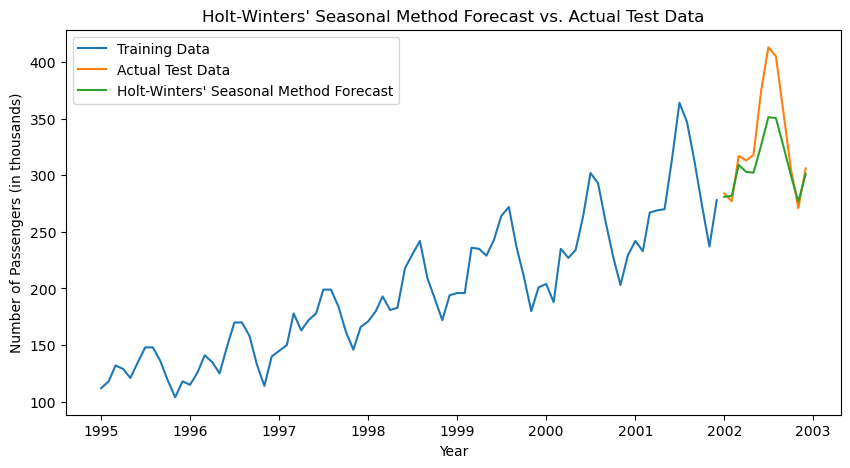

In [16]:
import matplotlib.pyplot as plt

# plot Holt-Winters' Seasonal Method forecast and actual test data
plt.figure(figsize=(10, 5))
plt.plot(train_data.index,train_data['Passengers'], label='Training Data')
plt.plot(test_data.index, test_data['Passengers'], label='Actual Test Data')
plt.plot(y_hat_hw.index, y_hat_hw['hw_forecast'], label='Holt-Winters\' Seasonal Method Forecast')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Number of Passengers (in thousands)')
plt.title('Holt-Winters\' Seasonal Method Forecast vs. Actual Test Data')
plt.show()


The output of this code is a line chart that shows the actual test data, the training data, and the forecasted values generated by the Holt-Winters' Seasonal Method.

The blue line represents the training data, which is the historical data that is used to train the forecasting model. The orange line represents the actual test data, which is the data that the model was not trained on, but that we have in order to evaluate the model's performance. The green line represents the forecasted values generated by the Holt-Winters' Seasonal Method.

By comparing the green line (forecasted values) with the orange line (actual test data), we can see that the Holt-Winters' Seasonal Method is able to capture the overall trend and seasonal patterns of the data quite well. However, there are some periods where the actual values deviate from the forecasted values, indicating that the model is not perfect.

Based on this output, we can predict the number of airline passengers for future time periods using the Holt-Winters' Seasonal Method. However, it's important to keep in mind that the model's performance may vary depending on the specific data and time period being forecasted. Additionally, other forecasting methods may also be used and may perform better or worse depending on the data and use case.

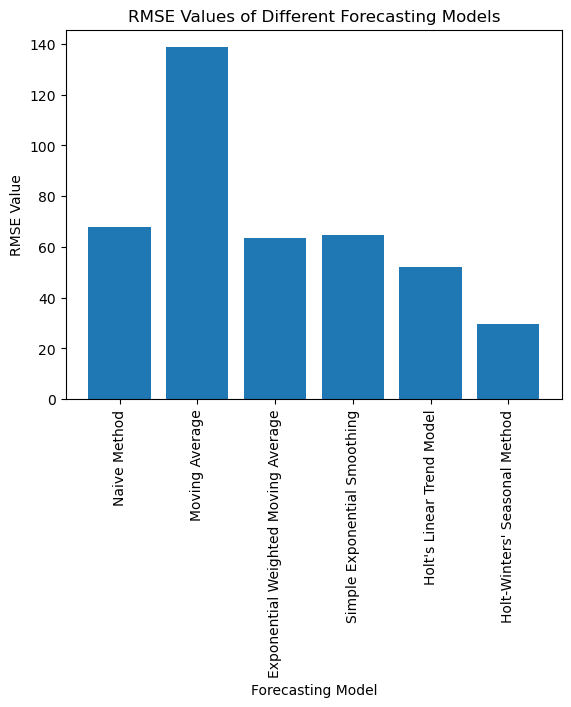

In [18]:
# create bar chart of RMSE values
rmse_values = [rmse_naive, rmse_avg, rmse_avg_ma, rmse_ses, rmse_holt, rmse_hw]
model_names = ['Naive Method', 'Moving Average', 'Exponential Weighted Moving Average', 
               'Simple Exponential Smoothing', 'Holt\'s Linear Trend Model', 'Holt-Winters\' Seasonal Method']
plt.bar(model_names, rmse_values)
plt.xticks(rotation=90)
plt.xlabel('Forecasting Model')
plt.ylabel('RMSE Value')
plt.title('RMSE Values of Different Forecasting Models')
plt.show()
